In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [2]:
k = 8                       # number of information bits
N = 16                      # code length

SNR_dB_start_Eb = -4
SNR_dB_stop_Eb  = +12
SNR_points = 2*(SNR_dB_stop_Eb-SNR_dB_start_Eb+1)
print(f'start = {SNR_dB_start_Eb}\nstop = {SNR_dB_stop_Eb}\nsteps = {SNR_points}')

SNR_dB_start_Es = SNR_dB_start_Eb + 10*np.log10(k/N)
SNR_dB_stop_Es = SNR_dB_stop_Eb + 10*np.log10(k/N)
print(f'SNR_dB_start_Es = {SNR_dB_start_Es}')
print(f'SNR_dB_stop_Es = {SNR_dB_stop_Es}')

sigma_start = np.sqrt(1/(2*10**(SNR_dB_start_Es/10)))
sigma_stop = np.sqrt(1/(2*10**(SNR_dB_stop_Es/10)))
print(f'sigma_start = {sigma_start}')
print(f'sigma_start = {sigma_stop}')

sigmas = np.linspace(sigma_start, sigma_stop, SNR_points)
sigmas_db = 10*np.log10(1/(2*sigmas**2)) - 10*np.log10(k/N)
print(f'sigmas = {sigmas}')
print(f'sigmas_db = {sigmas_db}')

start = -4
stop = 12
steps = 34
SNR_dB_start_Es = -7.0102999566398125
SNR_dB_stop_Es = 8.989700043360187
sigma_start = 1.5848931924611136
sigma_start = 0.25118864315095807
sigmas = [1.58489319 1.5444779  1.50406261 1.46364732 1.42323203 1.38281675
 1.34240146 1.30198617 1.26157088 1.22115559 1.1807403  1.14032501
 1.09990972 1.05949443 1.01907914 0.97866385 0.93824856 0.89783327
 0.85741798 0.81700269 0.77658741 0.73617212 0.69575683 0.65534154
 0.61492625 0.57451096 0.53409567 0.49368038 0.45326509 0.4128498
 0.37243451 0.33201922 0.29160393 0.25118864]
sigmas_db = [-4.         -3.77563398 -3.54531832 -3.30872886 -3.06551421 -2.8152926
 -2.55764829 -2.2921274  -2.0182331  -1.73542002 -1.44308772 -1.14057299
 -0.8271408  -0.50197356 -0.16415825  0.18732905  0.55364185  0.93608608
  1.33614823  1.75553022  2.19619315  2.66041273  3.15085048  3.67064609
  4.22353938  4.81403366  5.44761888  6.13108266  6.87295457  7.68415842
  8.57900165  9.57673545 10.70413247 12.        ]


In [3]:
def theoretic_symbol_error_rate(Es_No_dB):
    Es_No = 10.0**(Es_No_dB/10.0)
    return 0.5*math.erfc(np.sqrt(Es_No))

In [4]:
BER_theoretic_hist = []
for Es_No_dB in sigmas_db:
    BER_theoretic = theoretic_symbol_error_rate(Es_No_dB)
    BER_theoretic_hist.append(BER_theoretic)
    print(f'Es_No_dB = {Es_No_dB:.3f}\tBER_t = {BER_theoretic:.3e}')

Es_No_dB = -4.000	BER_t = 1.861e-01
Es_No_dB = -3.776	BER_t = 1.799e-01
Es_No_dB = -3.545	BER_t = 1.735e-01
Es_No_dB = -3.309	BER_t = 1.670e-01
Es_No_dB = -3.066	BER_t = 1.602e-01
Es_No_dB = -2.815	BER_t = 1.532e-01
Es_No_dB = -2.558	BER_t = 1.461e-01
Es_No_dB = -2.292	BER_t = 1.387e-01
Es_No_dB = -2.018	BER_t = 1.311e-01
Es_No_dB = -1.735	BER_t = 1.234e-01
Es_No_dB = -1.443	BER_t = 1.155e-01
Es_No_dB = -1.141	BER_t = 1.075e-01
Es_No_dB = -0.827	BER_t = 9.926e-02
Es_No_dB = -0.502	BER_t = 9.097e-02
Es_No_dB = -0.164	BER_t = 8.261e-02
Es_No_dB = 0.187	BER_t = 7.422e-02
Es_No_dB = 0.554	BER_t = 6.587e-02
Es_No_dB = 0.936	BER_t = 5.761e-02
Es_No_dB = 1.336	BER_t = 4.953e-02
Es_No_dB = 1.756	BER_t = 4.173e-02
Es_No_dB = 2.196	BER_t = 3.430e-02
Es_No_dB = 2.660	BER_t = 2.736e-02
Es_No_dB = 3.151	BER_t = 2.105e-02
Es_No_dB = 3.671	BER_t = 1.546e-02
Es_No_dB = 4.224	BER_t = 1.073e-02
Es_No_dB = 4.814	BER_t = 6.916e-03
Es_No_dB = 5.448	BER_t = 4.050e-03
Es_No_dB = 6.131	BER_t = 2.087e-03
Es_No

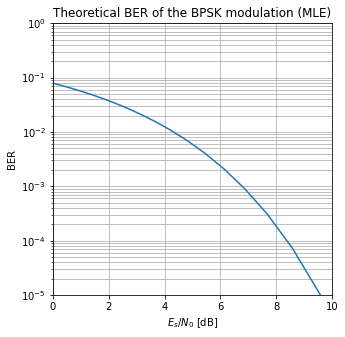

In [5]:
plt.rcParams["figure.figsize"] = (5,5)
plt.semilogy(sigmas_db, BER_theoretic_hist)
plt.grid(True, which="both")
plt.xlabel('$E_s/N_0$ [dB]')
plt.ylabel('BER')
plt.xlim(0, 10)
plt.ylim(1e-5, 1e0)
plt.title('Theoretical BER of the BPSK modulation (MLE)')
plt.show()

In [6]:
from IPython.display import Image
from IPython.core.display import HTML 
reference_image = 'https://www.gaussianwaves.com/gaussianwaves/wp-content/uploads/2020/07/Bit-error-rate-performance-of-BPSK-modulation-over-AWGN-using-Python.png'
Image(url=reference_image, width=360, height=360)